In [1]:
import seaborn as sns

from casual_inference.dataset import create_sample_ab_result
from casual_inference.evaluator import ABTestEvaluator

In [2]:
data = create_sample_ab_result(n_variant=3, sample_size=1000000, simulated_lift=[-0.01, 0.01])
data.head()

,rand_unit,variant,metric_bin,metric_cont
0,0,1,0,2
1,1,2,0,0
2,2,2,0,0
3,3,1,0,0
4,4,3,0,0


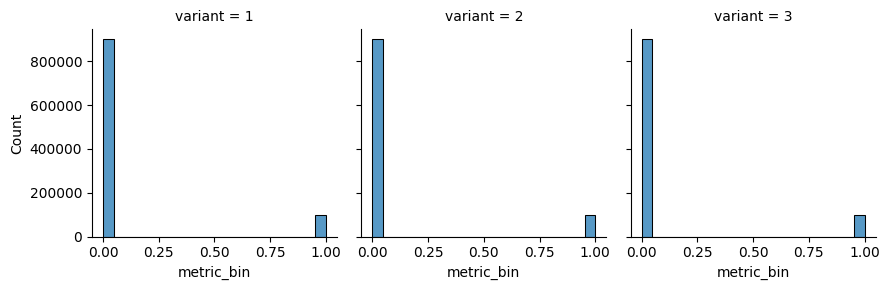

In [3]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="metric_bin")

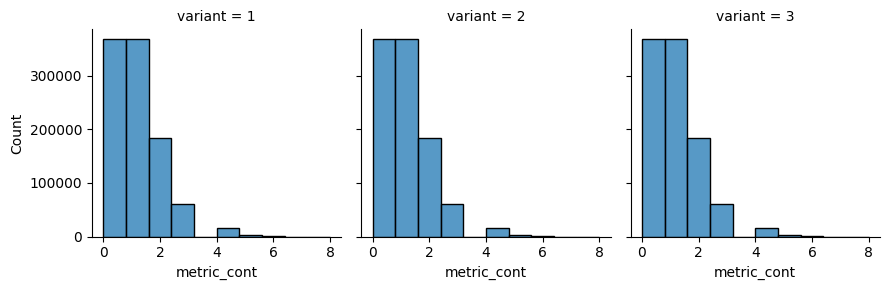

In [12]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="metric_cont", bins=10)

In [4]:
evaluator = ABTestEvaluator()
evaluator.evaluate(
    data=data,
    unit_col="rand_unit",
    variant_col="variant",
    metrics=["metric_bin", "metric_cont"]
)

In [5]:
evaluator.summary_table()

,variant,metric,mean,var,count,std,stderr,abs_diff_mean,abs_diff_std,rel_diff_mean,rel_diff_std,t_value,dof,p_value,significance,ci_abs_diff,ci_rel_diff
0,1,metric_bin,0.099513,0.089610,332822,0.299350,0.000519,0.000000,0.000734,0.000000,0.007374,0.000000,665642.000000,1.000000e+00,unclear,"(-0.0014382569342234605, 0.0014382569342234605)","(-0.014453005717455331, 0.014453005717455331)"
1,2,metric_bin,0.098641,0.088911,333534,0.298179,0.000516,-0.000872,0.000732,-0.008763,0.007323,-1.191313,666329.579765,2.335313e-01,unclear,"(-0.0023067192508000895, 0.0005626511287192286)","(-0.0231168156181383, 0.005590721399322065)"
2,3,metric_bin,0.101099,0.090878,333644,0.301460,0.000522,0.001586,0.000736,0.015939,0.007454,2.155203,666450.152311,3.114634e-02,up,"(0.00014368345127774816, 0.0030285636127783903)","(0.001328565952502964, 0.030549260507439453)"
3,1,metric_cont,1.001650,1.001307,332822,1.000653,0.001735,0.000000,0.002453,0.000000,0.002449,0.000000,665642.000000,1.000000e+00,unclear,"(-0.004807746441610057, 0.004807746441610057)","(-0.004799828977894125, 0.004799828977894125)"
4,2,metric_cont,0.987884,0.986145,333534,0.993049,0.001719,-0.013765,0.002442,-0.013743,0.002422,-5.636006,666290.456221,1.741096e-08,down,"(-0.01855221152858387, -0.008978261920181488)","(-0.0184886489884862, -0.008996486893653989)"
5,3,metric_cont,1.011135,1.011301,333644,1.005635,0.001741,0.009485,0.002458,0.009469,0.002465,3.859552,666459.837860,1.136058e-04,up,"(0.00466834830497972, 0.0143018359994164)","(0.004637923284712228, 0.014301020656295696)"


In [6]:
evaluator.summary_barplot()

![eval_result](images/plot_abtestevaluator_result.png)